# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [6]:
import os
import keras
from keras.layers import Dense,Input
from keras.models import Sequential, Model

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128]):
    """
    Build your own model
    """
    input_layer = Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0 :
            x = Dense(units=n_units, activation='relu', name='hidden_name' + str(i+1))(input_layer)
        else:
            x = Dense(units=n_units, activation='relu', name='hidden_name' + str(i+1))(x)
        
    out = Dense(units=output_units, activation='softmax', name='output' + str(i+1))(x)
    
    model = Model(inputs=[input_layer], outputs=[out])
    
    return model

In [26]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3]
EPOCHS = 2
BATCH_SIZE = 256
MOMENTUM = 0.9

In [56]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
def Opts(opt):
    for lr in LEARNING_RATE:
#         keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR %.6f" %(lr))

        model = build_mlp(x_train.shape[1:])
        model.summary()
        

#         opt = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
        model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(x_train, y_train,
                 epochs= EPOCHS,
                 batch_size=BATCH_SIZE,
                 validation_data = (x_test, y_test),
                 shuffle=True)
    
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-lr-%s" % str(lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}
 


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
def plts():
    color_bar = ["r", "g", "b", "y", "m", "k"]

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

Experiment with LR 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_name1 (Dense)         (None, 512)               1573376   
_________________________________________________________________
hidden_name2 (Dense)         (None, 256)               131328    
_________________________________________________________________
hidden_name3 (Dense)         (None, 128)               32896     
_________________________________________________________________
output3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================]

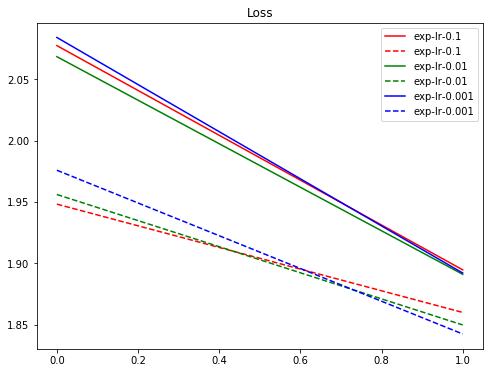

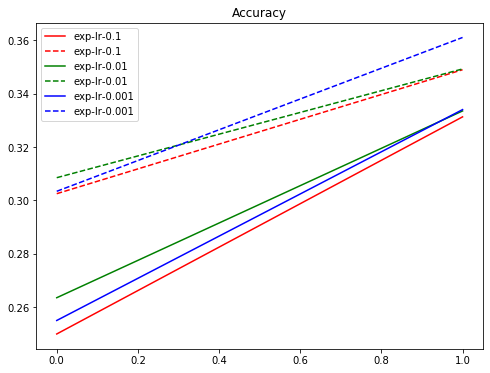

Experiment with LR 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_name1 (Dense)         (None, 512)               1573376   
_________________________________________________________________
hidden_name2 (Dense)         (None, 256)               131328    
_________________________________________________________________
hidden_name3 (Dense)         (None, 128)               32896     
_________________________________________________________________
output3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================]

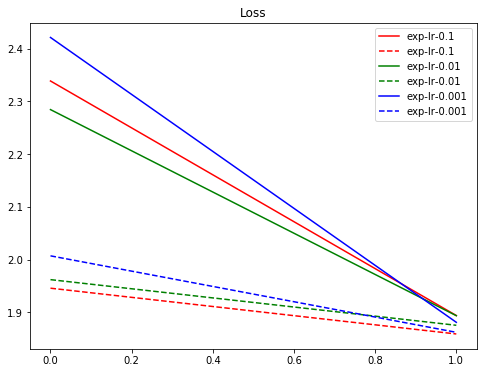

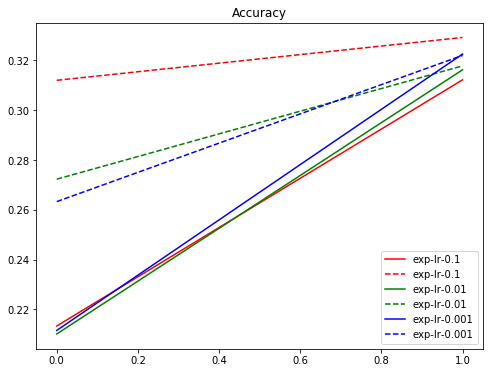

Experiment with LR 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_name1 (Dense)         (None, 512)               1573376   
_________________________________________________________________
hidden_name2 (Dense)         (None, 256)               131328    
_________________________________________________________________
hidden_name3 (Dense)         (None, 128)               32896     
_________________________________________________________________
output3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================]

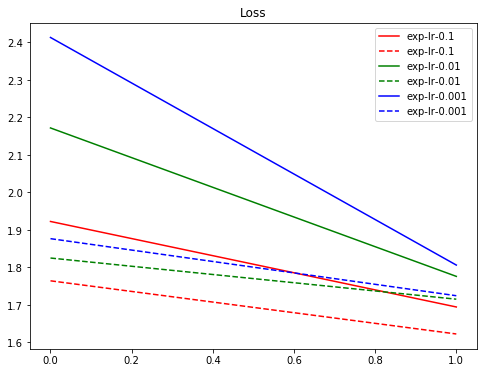

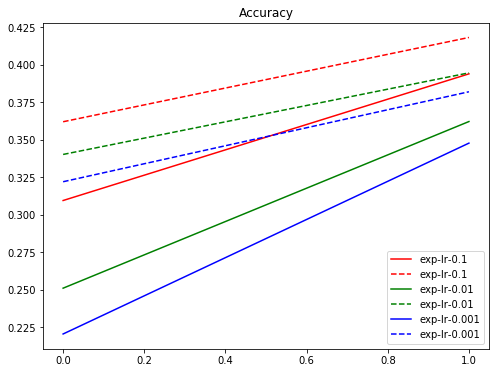

Experiment with LR 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_name1 (Dense)         (None, 512)               1573376   
_________________________________________________________________
hidden_name2 (Dense)         (None, 256)               131328    
_________________________________________________________________
hidden_name3 (Dense)         (None, 128)               32896     
_________________________________________________________________
output3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================]

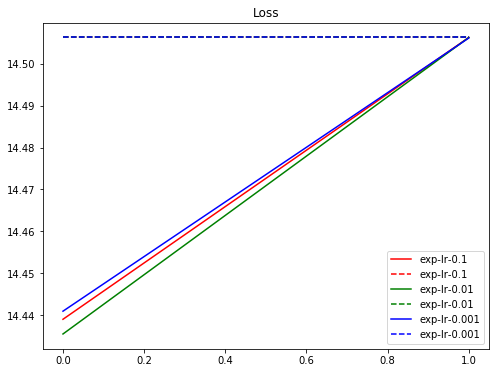

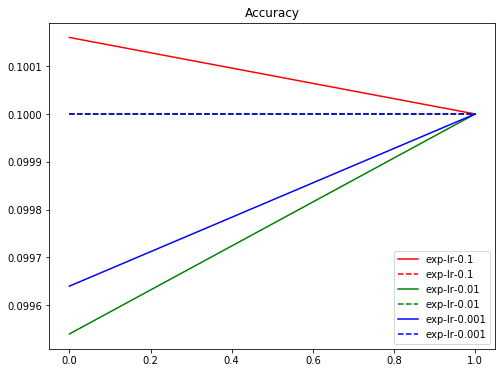

In [57]:
sgd = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
rmsprop = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adagrad = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)

opts = [sgd, rmsprop, adam, adagrad]

for opt in opts:
    Opts(opt)
    plts()